<a href="https://colab.research.google.com/github/BrianDL/fisica_computacional/blob/main/1%20-%20M%C3%A9todo%20de%20Euler/euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np

### definimos primero los parámetros con los valores dados
### por defecto
def proyectil(
    b2_m:float = 0.00004  # b2 sobre m
    , g:float = 9.8         # el valor de la gravedad
    , v_0:float = 700       # velocidad inicial
    , theta:float = (1.0/6)*np.pi   # el ángulo inicial
    , N:int = 100000        # el número de iteraciones a realizar
    , delta_t:float = 0.01  # tamaño de paso de la simulación
    , stop_fn = None
  ):

  stop_fn = stop_fn if stop_fn is not None else \
    lambda i,x,y,vx,vy: i >= N

  ### extraemos algunos valores iniciales
  x:float   = 0
  y:float   = 0
  v_x:float = v_0 * np.cos(theta)
  v_y:float = v_0 * np.sin(theta)
  #print("INIT", x, y, v_x, v_y)

  ### iteramos luego el número deseado
  ### de veces y devolvemos los resultados
  xs:list = []
  ys:list = []
  vel_xs:list = []
  vel_ys:list = []

  i = 0
  while not stop_fn(i,x,y,v_x,v_y):
    current_v = v(v_x,v_y)

    v_x = round(v_x -(b2_m) * v_x * current_v * delta_t, 5)
    v_y = round(v_y -(b2_m) * v_y * current_v * delta_t -g*delta_t, 5)

    x = x +v_x*delta_t
    y = y +v_y*delta_t

    ### guardamos los resultados
    xs.append(x)
    ys.append(y)

    vel_xs.append(v_x)
    vel_ys.append(v_y)

    i+=1

    #print("STEP", i , x, y, v_x, v_y)

  return (xs, ys, vel_xs, vel_ys)


### funciones auxiliares
def v(v_x, v_y):
  return np.sqrt( v_x**2 + v_y**2 )

def es_x_maximo(i,x,y,vx,vy)->bool:
  return i > 0 and y <= 0




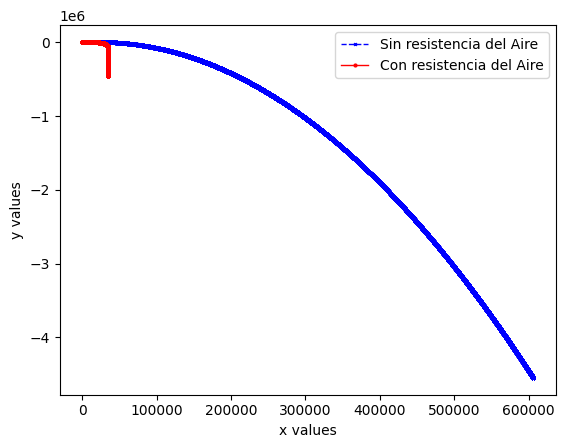

In [9]:
import matplotlib.pyplot as plt

### Simulamos ahora un lanzamiento de proyectil
### sin resistencia del aire, para esto configuramos
### b2/m = 0 y mostramos la trayectoria

(xs_0, ys_0, _, _) = proyectil(b2_m=0) # sin resistencia del aire
(xs, ys, _, _) = proyectil() # con resistencia del aire

plt.plot(xs_0, ys_0, marker='x', linestyle='--'
  , color='b', label='Sin resistencia del Aire'
  , linewidth= 1, markersize=2)
plt.plot(xs, ys, marker='o', linestyle='-'
  , color='r', label='Con resistencia del Aire'
  , linewidth= 1, markersize=2)


# plt.title('Plot of xs vs ys and xs_0 vs ys_0')
plt.xlabel('x values')
plt.ylabel('y values')

plt.legend()

plt.show()

MAX_X: 21278.033589999934


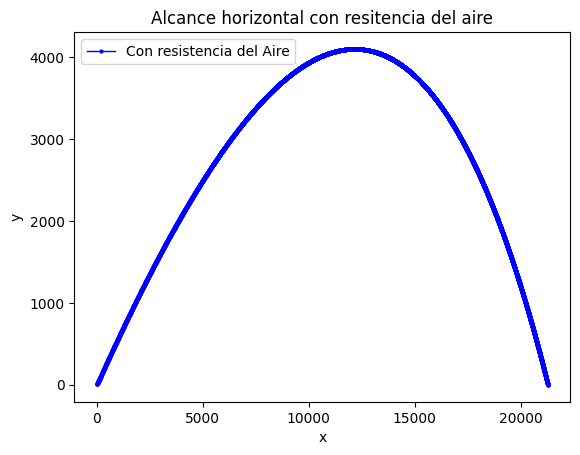

In [10]:
### para encontrar el alcance horizontal, pasamos una función que le
### indique a la simulación que se detenga al encontrar y <= 0

(xs, ys, _, _) = proyectil(stop_fn= es_x_maximo)

print('MAX_X:', xs[-1])

plt.plot(xs, ys, marker='o', linestyle='-'
  , color='b', label='Con resistencia del Aire'
  , linewidth= 1, markersize=2)


plt.title('Alcance horizontal con resitencia del aire')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()

plt.show()


In [11]:
### Usamos la misma estrategia para comparar varios
### ángulos y el alcance horizontal que tienen

def angulos_a_alcance(
    delta_theta:int = 5   # en grados
    , b2_m:float = 0.0    # ignoramos la resistencia del aire por defecto
  ):

  resultado = {}

  grados = 0
  while grados < 90:
    theta = radianes_desde(grados)

    xs, _, _, _= proyectil(
          theta= theta  # usamos el ángulo dado
          , b2_m= b2_m
          , stop_fn= es_x_maximo # detenemos cada simulación en x máximo
        )

    resultado[grados] = xs[-1]
    #print('STEP', grados, resultado[theta])

    grados += delta_theta

  return resultado

### funciones auxiliares
def radianes_desde(grados:int)-> float:
  return (np.pi/180) * grados

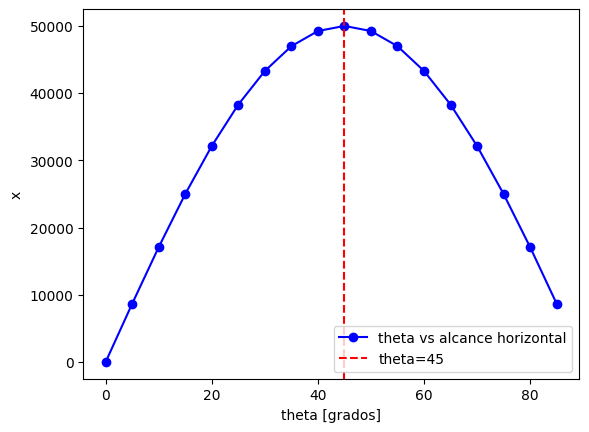

In [12]:
resultado = angulos_a_alcance() # simulamos muchos tiros parabólicos


ts = list(resultado.keys())
xs = list(resultado.values())

plt.plot(ts, xs, marker='o', linestyle='-', color='b', label='theta vs alcance horizontal')
plt.axvline(x=45, color='r', linestyle='--', label='theta=45')  # dibujamos una línea vertical en theta = 45

#plt.title('Plot of xs vs ys and xs_0 vs ys_0')
plt.xlabel('theta [grados]')
plt.ylabel('x')

plt.legend()

plt.show()


MÁXIMO_ALCANCE_HORIZONTAL (38.5, 22062.560869300076)


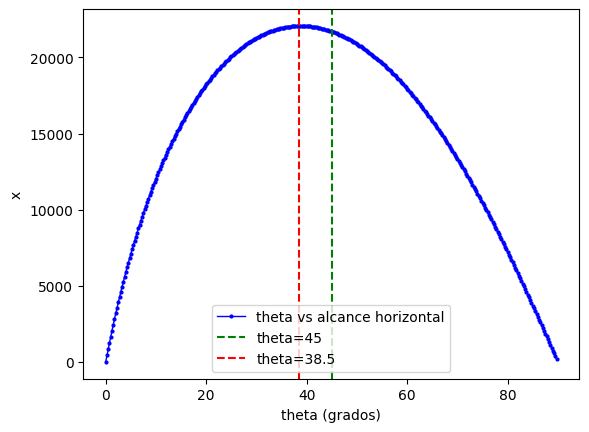

In [13]:
### Para el caso con resistencia del aire,

resultado = angulos_a_alcance(b2_m=0.00004, delta_theta= 0.25) # simulamos muchos tiros parabólicos

ts = list(resultado.keys())
xs = list(resultado.values())

plt.plot(ts, xs, marker='o', linestyle='-'
  , color='b', label='theta vs alcance horizontal'
  , linewidth= 1, markersize=2)

items = list(resultado.items())

item_max_x = sorted(items, key=lambda i: i[1])[-1]
grados_max_x, max_x = item_max_x

print('MÁXIMO_ALCANCE_HORIZONTAL', item_max_x)

plt.axvline(x=45, color='g', linestyle='--', label= 'theta=45')
plt.axvline(x=grados_max_x, color='r', linestyle='--', label= f'theta={grados_max_x}')

#plt.title('Plot of xs vs ys and xs_0 vs ys_0')
plt.xlabel('theta (grados)')
plt.ylabel('x')

plt.legend()

plt.show()


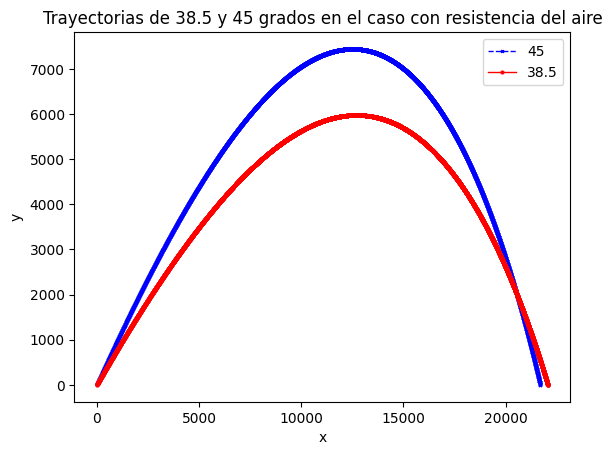

In [14]:
### Comparamos dos ángulos de lanzamiento diferente con resistencia del aire
(xs_0, ys_0, _, _) = proyectil(theta=(0.25*np.pi), stop_fn=es_x_maximo) # 45 grados
(xs, ys, _, _) = proyectil(theta=(np.pi/180.0)*38.5, stop_fn=es_x_maximo) # 38.5

plt.plot(xs_0, ys_0, marker='x', linestyle='--'
  , color='b', label='45'
  , linewidth= 1, markersize=2)
plt.plot(xs, ys, marker='o', linestyle='-'
  , color='r', label='38.5'
  , linewidth= 1, markersize=2)


plt.title('Trayectorias de 38.5 y 45 grados en el caso con resistencia del aire')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()

plt.show()